# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [18]:
from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

import os

#this makes my plots pretty! but it is totally not mandatory to do it
#import json
#s = json.load( open(os.getenv ('PUI2016')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

#plus importing scipy.stats
import scipy.stats



Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('World firearms murders and ownership - Sheet 1.csv',
                 usecols=[0,4,8])
df=df.rename(columns={'Country/Territory':'Country Name'})
df.head()

,Country Name,Number of homicides by firearm,Average total all civilian firearms
0,Albania,56.0,270000.0
1,Algeria,20.0,1900000.0
2,Angola,NaN,2800000.0
3,Anguilla,1.0,NaN
4,Argentina,1198.0,3950000.0


In [3]:
gdp = pd.read_csv( 'API_NY.GDP.MKTP.CD_DS2_en_excel_v2.csv',usecols=[0,56])
gdp.rename(columns = lambda x:x.replace("2012","gdp"), inplace = True)
gdp.rename(columns={'\xef\xbb\xbfCountry Name':'Country Name'},inplace = True)
gdp.head()

,Country Name,gdp
0,Aruba,NaN
1,Afghanistan,2.053654e+10
2,Angola,1.153980e+11
3,Albania,1.231978e+10
4,Andorra,3.146152e+09


In [4]:
pop = pd.read_csv('API_SP.POP.TOTL_DS2_en_excel_v2.csv',usecols=[0,56])
#pop.rename(columns = {'2016':"pop"})
pop.rename(columns = lambda x:x.replace("2012","pop"), inplace = True)
pop.rename(columns={'\xef\xbb\xbfCountry Name':'Country Name'},inplace = True)
pop.head()


,Country Name,pop
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [5]:
last = pd.read_csv(os.getenv("PUIDATA") +'/'+  'data-pvLFI.csv')
last=last.rename(columns={"Country":"Country Name"})
last.head()

,Country Name,Guns/100 inhabitants,Number of mass shootings
0,Australia,15.0,4
1,Austria,30.4,1
2,Beligium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [6]:
df=df.merge(pop,on="Country Name")
df=df.merge(gdp,on="Country Name")
df=df.merge(last,on="Country Name")
df.head()

,Country Name,Number of homicides by firearm,Average total all civilian firearms,pop,gdp,Guns/100 inhabitants,Number of mass shootings
0,Australia,30.0,3050000.0,22728254.0,1.538190e+12,15.0,4
1,Austria,18.0,2500000.0,8429991.0,4.074520e+11,30.4,1
2,Canada,173.0,9950000.0,34750545.0,1.824290e+12,30.8,4
3,Denmark,15.0,650000.0,5591572.0,3.271490e+11,12.0,0
4,Finland,24.0,2400000.0,5413971.0,2.567060e+11,45.3,2


# exploration

## 1.plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


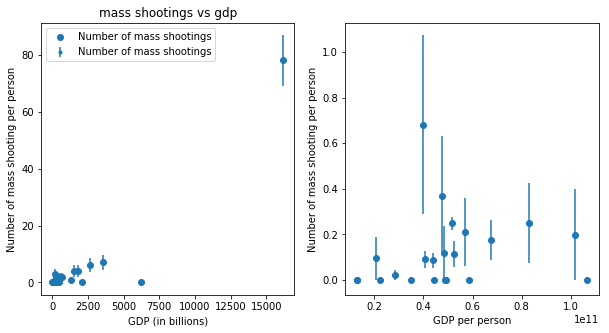

Figure1: Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of mass shootings


In [7]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(121)

scatter = ax.scatter(df.gdp / 1e9, df['Number of mass shootings'])
ax.errorbar(df.gdp / 1e9, df['Number of mass shootings'], 
           yerr = np.sqrt(df['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
ax.set_title('mass shootings vs gdp')
pl.legend()

ax1 = fig.add_subplot(122)
scatter = ax1.scatter(df['gdp'] / df['pop']*1e6, df['Number of mass shootings']/ df['pop']*1e6)
ax1.errorbar(df['gdp'] / df['pop']*1e6, df['Number of mass shootings'] / df['pop']*1e6, 
           yerr = np.sqrt(df['Number of mass shootings']) / df['pop'] * 1e6, fmt = '.')
ax1.set_xlabel("GDP per person")
ax1.set_ylabel("Number of mass shooting per person")
ax1.set_ylim()
pl.legend()

pl.show()
print ("Figure1: Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of mass shootings")


## 2.plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

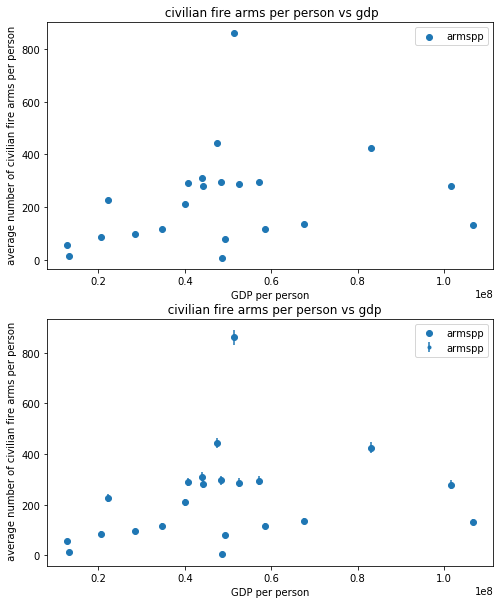

In [8]:
df['armspp'] = df["Average total all civilian firearms"] / df['pop'] * 1e3

fig = pl.figure(figsize=(8,10)) 

ax= fig.add_subplot(211)
scatter = ax.scatter(df['gdp']/ df['pop'] * 1e3 , df['armspp'])
ax.set_xlabel("GDP per person")
ax.set_ylabel(" average number of civilian fire arms per person")
ax.set_ylim()
ax.set_title(' civilian fire arms per person vs gdp')
ax.legend()


ax1= fig.add_subplot(212)
scatter = ax1.scatter(df['gdp']/ df['pop'] * 1e3 , df['armspp'])
ax1.errorbar(df['gdp']/ df['pop'] * 1e3, df['armspp'], 
           yerr = np.sqrt(df['armspp'] ), fmt = '.')
ax1.set_xlabel("GDP per person")
ax1.set_ylabel(" average number of civilian fire arms per person")
ax.set_ylim()
ax1.set_title('  civilian fire arms per person vs gdp')
ax1.legend()



Figure 2: Average number of civilian fire arms per person against GDP per person.

the average number of civilian fire arms per person against the gdp per person, errors represent Poisson statistics.

The datapoint on the top of the plot seems to be outlier.

## 3.plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

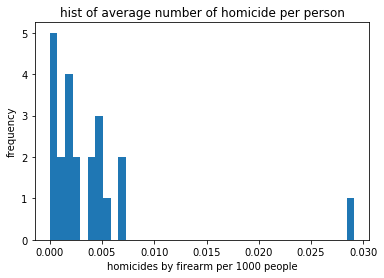

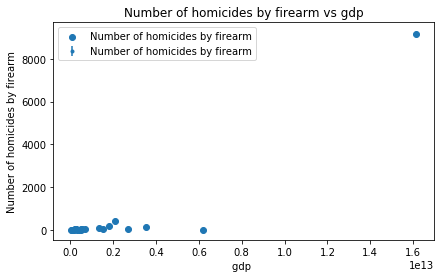

2 points seems look like outliers at the above corners


In [9]:
fig, ax = plt.subplots()
ax.hist(df['Number of homicides by firearm'] / df['pop'] * 1000,bins=40)
ax.set_xlabel('homicides by firearm per 1000 people')
ax.set_ylabel('frequency')
ax.set_title('hist of average number of homicide per person')
ax.legend()
pl.show()

then=pl.figure(figsize=(15,4)).add_subplot(122)
#scatter = ax.scatter(df.gdp / 1e9, df['Number of mass shootings'])
scatter=then.scatter(df.gdp , df['Number of homicides by firearm'])
then.errorbar(df.gdp , df['Number of homicides by firearm'], 
            yerr = np.sqrt(df['Number of homicides by firearm'] * 1.0), fmt = '.')
then.set_xlabel('gdp ')
then.set_ylabel('Number of homicides by firearm')
then.set_title('Number of homicides by firearm vs gdp')
then.legend()
pl.show()

print ('2 points seems look like outliers at the above corners')

Figure 3: Histogram of average number of homicides by firearms per person.
3.1: number of homicides by firearms against gdp

## 4.plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


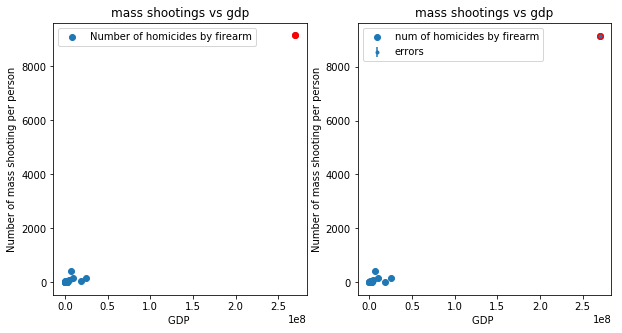

In [10]:
fig = pl.figure(figsize=(10,5)) 
ax2 = fig.add_subplot(121)

scatter = ax2.scatter(df['Average total all civilian firearms'], df['Number of homicides by firearm'])
#ax2.errorbar(df['Average total all civilian firearms'], df['Number of homicides by firearm'], 
           #yerr = np.sqrt(df['Number of mass shootings'] * 1.0), fmt = '.')
ax2.set_xlabel("GDP ")
ax2.set_ylabel("Number of mass shooting per person")
ax2.set_ylim()
ax2.set_title('mass shootings vs gdp')
pl.legend()
usa = ax2.plot(df['Average total all civilian firearms'][21], df['Number of homicides by firearm'][21], 'ro')



#with errors
ax3= fig.add_subplot(122)
scatter = ax3.scatter(df['Average total all civilian firearms'], df['Number of homicides by firearm'])
ax3.errorbar(df['Average total all civilian firearms'], df['Number of homicides by firearm'], 
           yerr = np.sqrt(df['Number of mass shootings'] * 1.0), fmt = '.')
ax3.set_xlabel("GDP ")
ax3.set_ylabel("Number of mass shooting per person")
ax3.set_ylim()
ax3.set_title('mass shootings vs gdp')
pl.legend(['num of homicides by firearm','errors'])
usa1 = ax3.plot(df['Average total all civilian firearms'][21], df['Number of homicides by firearm'][21], 'ro')

pl.show()
#print ('at the right up corner, there seems to be an outlier, maybe USA')

Figure 4: massshootings again gdps without and with errors.

The point represents the USA is red.

## 5.plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


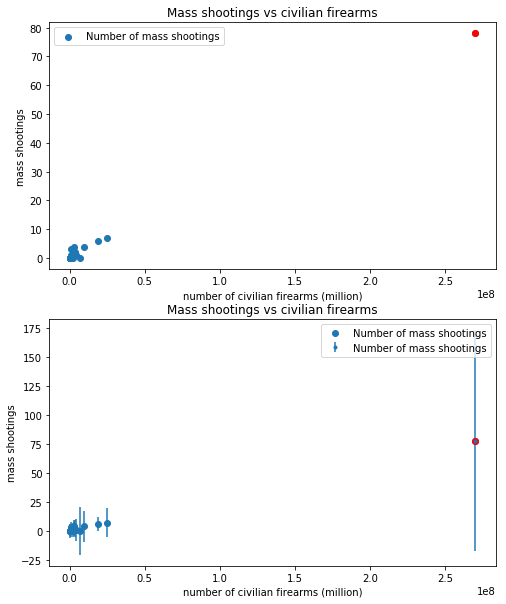

In [11]:
fig = plt.figure(figsize=(8,10)) 

ax1 = fig.add_subplot(211)
scatter = ax1.scatter(df['Average total all civilian firearms'], df['Number of mass shootings'])
ax1.set_xlabel('number of civilian firearms (million)')
ax1.set_ylabel('mass shootings')
ax1.set_ylim()
ax1.legend()
usa = ax1.plot(df['Average total all civilian firearms'][21], df['Number of mass shootings'][21], 'ro')
plt.title("Mass shootings vs civilian firearms")

ax2 = fig.add_subplot(212)
scatter = ax2.scatter(df['Average total all civilian firearms'], df['Number of mass shootings'])
ax2.errorbar(df['Average total all civilian firearms'], df['Number of mass shootings'], 
            yerr = np.sqrt(df['Number of homicides by firearm']*1.0), fmt = '.')
ax2.set_xlabel('number of civilian firearms (million)')
ax2.set_ylabel('mass shootings')
ax2.set_ylim()
usa1 = ax2.plot(df['Average total all civilian firearms'][21], df['Number of mass shootings'][21], 'ro')
ax2.legend()
plt.title("Mass shootings vs civilian firearms")

plt.show()



# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [15]:
#Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity).
#(You can simply divide by the order of magnitude of the mean of the sample to obtain this)
df['firearmsPP'] = df['Average total all civilian firearms'] / df['pop'] 
df['massshootsPP'] = df['Number of mass shootings'] / df['pop'] * 1e6

print("magnitude of the Average total all civilian firearms per person is {}".format(df['firearmsPP'].mean()))
print("magnitude of the Number of mass shootings per person is {}".format(df['massshootsPP'].mean()))

magnitude of the Average total all civilian firearms per person is 0.228950085729
magnitude of the Number of mass shootings per person is 0.121021254397


In [21]:
# now are the same order of magnitude
#1.OLS
lm1 = sm.OLS(df['massshootsPP'], df['firearmsPP']).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           massshootsPP   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     19.31
Date:                Tue, 17 Oct 2017   Prob (F-statistic):           0.000253
Time:                        22:53:38   Log-Likelihood:                 11.220
No. Observations:                  22   AIC:                            -20.44
Df Residuals:                      21   BIC:                            -19.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
firearmsPP     0.4748      0.108      4.394      0.000         0.250     0.700
==============================================================================
Omnibus:                       33.992   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.045
Skew:                           2.646   Prob(JB):                     3.41e-19
Kurtosis:                      11.048   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

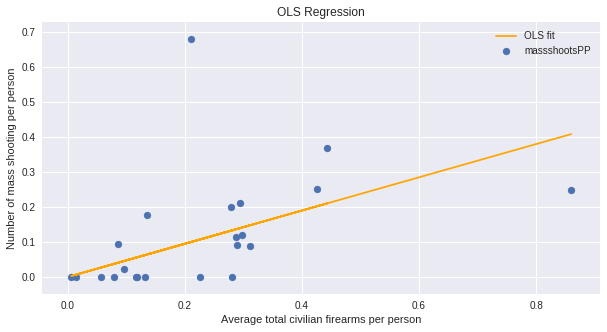

In [24]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

pl.scatter(df['firearmsPP'],df['massshootsPP'])
ax.plot( df['firearmsPP'],lm1.predict(), c="orange", label="OLS fit")
ax.set_xlabel("Average total civilian firearms per person")
ax.set_ylabel("Number of mass shooting per person")
ax.set_title('OLS Regression')
ax.set_ylim()
pl.legend()
pl.show()

**Figure 1 :** use OLS to fit a line

In [33]:
#WLS
df['y_error'] = np.sqrt(df['Number of mass shootings']) / df['pop']
e_mean = df['y_error'].mean()
df['y_error'][(df['y_error'] == 0)] = e_mean
df['y_error'] = df['y_error'] ** 2
wls_model = sm.WLS(df['massshootsPP'],df['firearmsPP'], weights=1/df['y_error']).fit()
wls_model.summary()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:           massshootsPP   R-squared:                       0.901
Model:                            WLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     190.2
Date:                Tue, 17 Oct 2017   Prob (F-statistic):           5.38e-12
Time:                        23:06:19   Log-Likelihood:                 30.959
No. Observations:                  22   AIC:                            -59.92
Df Residuals:                      21   BIC:                            -58.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
firearmsPP     0.2917      0.021     13.790      0.000         0.248     0.336
==============================================================================
Omnibus:                        0.767   Durbin-Watson:                   1.571
Prob(Omnibus):                  0.681   Jarque-Bera (JB):                0.742
Skew:                           0.378   Prob(JB):                        0.690
Kurtosis:                       2.513   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

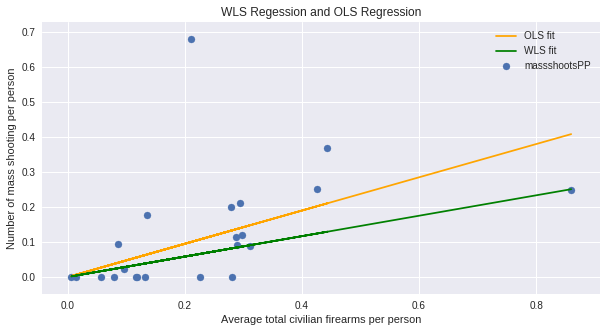

In [35]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

pl.scatter(df['firearmsPP'], df['massshootsPP'])
pl.plot(df['firearmsPP'],lm1.predict(), c="orange", label="OLS fit")
pl.plot(df['firearmsPP'],wls_model.predict(df['firearmsPP']), c="green", label="WLS fit")
ax.set_xlabel("Average total civilian firearms per person")
ax.set_ylabel("Number of mass shooting per person")
ax.set_title('WLS Regession and OLS Regression')
ax.set_ylim()
pl.legend()
pl.show()

**Figure 2:** Use statsmodels WLS and OLS to fit the line

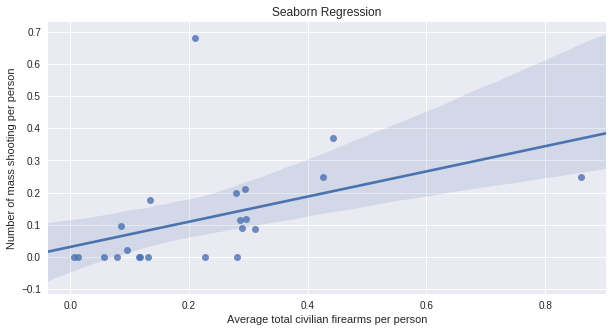

In [37]:
#Seaborn
#Use the seaborn python package built in regression function to plot the regression confidence intervals.
#import seaborn as sns sns.regplot(x="x", y="y", data=df);

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

ax = sns.regplot(x = df['firearmsPP'],y= df['massshootsPP'], data=df)
ax.set_xlabel("Average total civilian firearms per person")
ax.set_ylabel("Number of mass shooting per person")
ax.set_title('Seaborn Regression')
pl.legend()
pl.show()

**Figure 3:** Use seaborn 

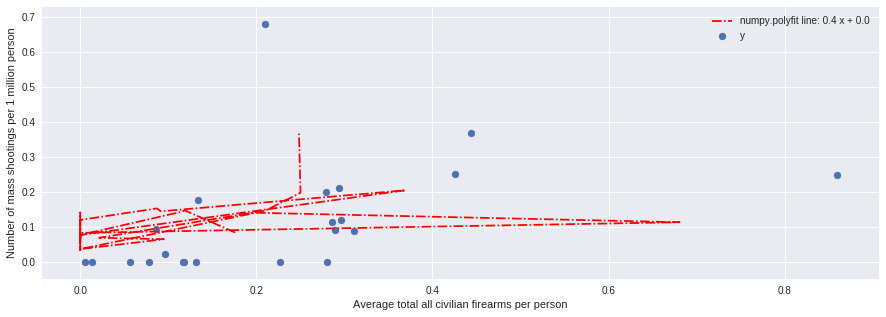

In [40]:
# numpy.polyfit
beta1, beta0 = np.polyfit(df['firearmsPP'],df['massshootsPP'],1)

fig = pl.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.scatter(df['firearmsPP'], df['massshootsPP'], label = "y")
ax.plot(df['massshootsPP'], df['firearmsPP'] * beta1 + beta0, 'r-.',
        label="numpy.polyfit line: %.1f x + %.1f"\
       %(beta1, beta0))
ax.set_ylabel("Number of mass shootings per 1 million person")
ax.set_xlabel("Average total all civilian firearms per person")
ax.legend()
pl.show()

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



In [12]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

IOError: [Errno 2] No such file or directory: u'../Lab5_fb55/confidence_intervals_regression.png'

In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

In [ ]:
pl.figure()
import seaborn  as sns
sns.regplot(x="x", y="y", data=df_);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

In [ ]:
sm.graphics.influence_plot(modelOLS, alpha  = 0.05, criterion="cooks");

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings